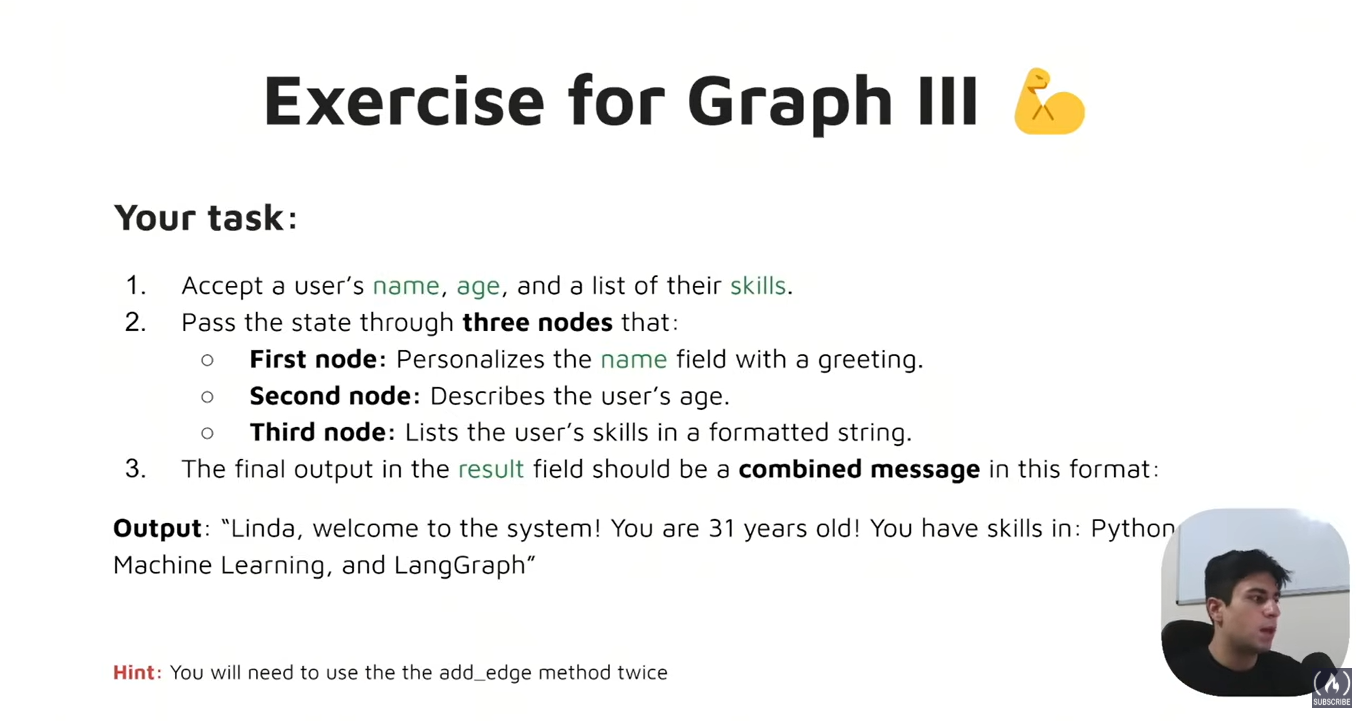

In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph

In [ ]:
class AgentState(TypedDict):
    name: str
    age: str
    skills: str
    output: str


In [23]:
def first_node(state:AgentState) -> AgentState:
    """First node in the sequnce"""
    state["output"] = f'Hi {state["name"]}'

    print(state)
    return state

In [30]:
def second_node(state:AgentState)-> AgentState:

    """second node in the sequence"""
    print(state)

    state['output'] = state['output'] + f' Your age is {state["age"]}'


    return state

In [31]:
def third_node(state:AgentState)-> AgentState:
    """Last node in the sequence"""

    state["output"] = state["output"] + f'You have skills in {state["skills"]}'

    return state

In [32]:
graph = StateGraph(AgentState)

graph.add_node("first",first_node)
graph.add_node("second",second_node)
graph.add_node("third", third_node)

graph.set_entry_point("first")
graph.add_edge("first","second")
graph.add_edge("second","third")
graph.set_finish_point("third")



app = graph.compile()

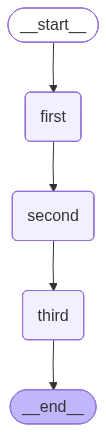

In [33]:
app

In [35]:
app.invoke(input={
    "name" : "Ishaan",
    "age" : "24",
    "skills" : "GenAI"
})

{'name': 'Ishaan', 'age': '24', 'skills': 'GenAI', 'output': 'Hi Ishaan'}
{'name': 'Ishaan', 'age': '24', 'skills': 'GenAI', 'output': 'Hi Ishaan'}


{'name': 'Ishaan',
 'age': '24',
 'skills': 'GenAI',
 'output': 'Hi Ishaan Your age is 24You have skills in GenAI'}